## 서포트 벡터 머신(Support Vector Machine) 개념 정리

[서포트 벡터 머신(Support Vector Machine) 쉽게 이해하기](https://hleecaster.com/ml-svm-concept/)

### 서포트 벡터 머신(SVM: Support Vector Machine)
- 분류를 위한 기준 선을 정의하는 모델
- 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해 분류 과제 수행
- **결정 경계**라는 것을 어떻게 정의하고 계산하는지 이해하는 것이 중요

#### **결정 경계**
- 2차원인 경우 결정 경계는 **선**이다.
- 단순한 평면이 아닌 고차원인 경우 **초평명(hyperplane)** 이라고 한다.

### 최적의 결정 경계

결정 경계는 데이터 군으로부터 최대한 멀리 떨어지는 것이 좋다. Support Vectors는 결정 경계와 가까이 있는 데이터 포인트들을 의미한다.

### 마진(Margin)
- 결정 경계와 서포트 벡터 사이의 거리
- 가운데 실선을 **결정 경계** 라 한다.
- **최적의 결정 경계는 마진을 최대화**한다.
- n개의 속성을 가진 데이터에는 최소 n+1개의 서포트 벡터가 존재한다.
- SVM에서 결정 경계를 정의하는 것이 서포트 벡터이므로 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 나머지 데이터들을 무시할 수 있다. 그래서 매우 빠르다.

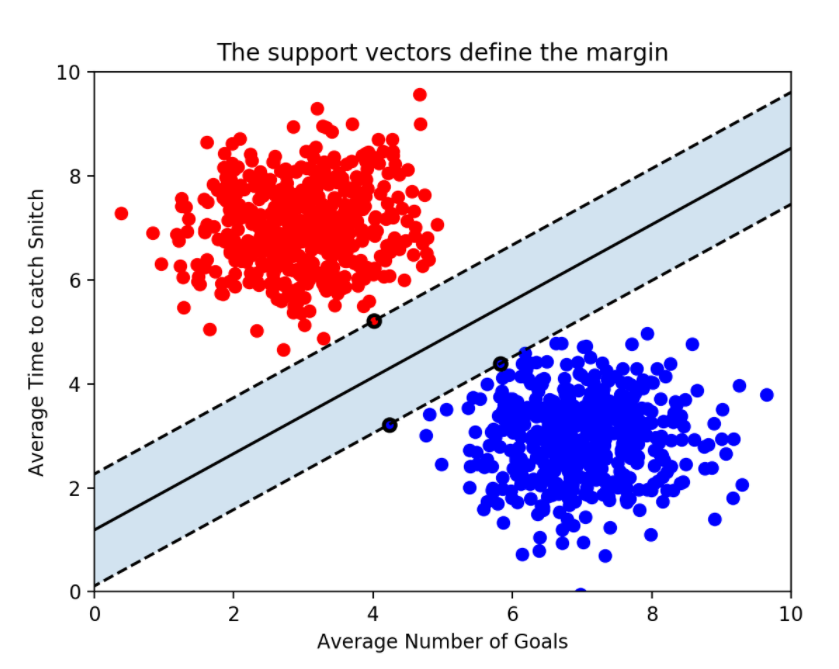

### sikit-learn 사용법

In [1]:
# SVC 패키지 로드
from sklearn.svm import SVC

# 학습 데이터 생성
training_points = [[1,2],[1,5],[2,2],[7,5],[9,4],[8,2]]
labels=[1,1,1,0,0,0]

# 모델 생성 및 학습
model = SVC(kernel='linear')
model.fit(training_points, labels)

# 예측
print(model.predict([[3,2]]))

In [3]:
# 결정 경계를 정의하는 서포트 벡터 확인
model.support_vectors_

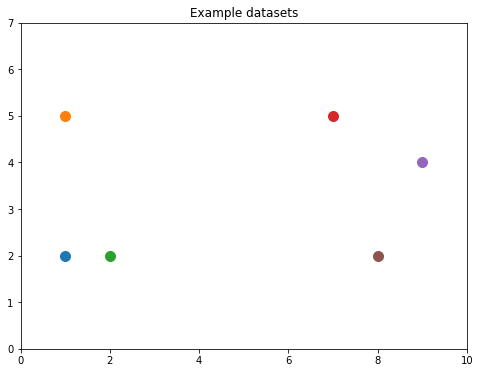

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Example datasets')
for i in range(6):
    plt.scatter(training_points[i][0], training_points[i][1],s=100)
    plt.xlim(0,10)
    plt.ylim(0, 7);

### 이상치(Outlier)를 얼마나 허용할 것인가

- SVM은 데이터 포인트들을 올바르게 분리하면서 마진의 크기를 최대화해야 하는데, 결국 이상치(outlier)를 잘 다루는 게 중요하다.
- 아래 그림에서 앞서 왼쪽에 혼자 튀어 있는 파란 점과, 오른쪽에 혼자 튀어 있는 빨간 점이 있다. 바로 아웃라이어다.

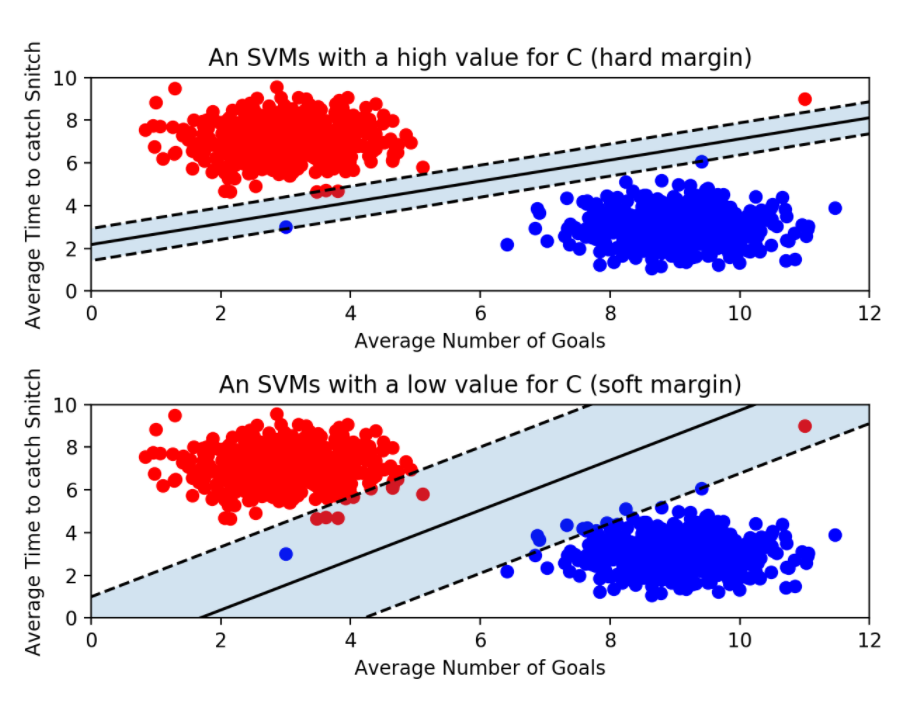

- 첫 번째 그림은 아웃라이어를 허용하지 않고 기준을 까다롭게 세운 모양으로 이것을 **하드 마진(hard margin)** 이라고 한다. 그리고 서포트 벡터와 결정 경계 사이의 거리가 매우 좁다. 즉, 마진이 작아진다. 이렇게 개별적인 학습 데이터들을 다 놓치지 않으려고 아웃라이어를 허용하지 않는 기준으로 결정 경계를 정하면 **오버피팅**이 발생한다.

- 두 번째는 아웃라이어들이 마진 안에 어느정도 포함되도록 너그럽게 기준을 잡았다. 이걸 **소프트 마진(soft margin)** 이라고 부른다. 이렇게 너그럽게 잡아 놓으니 서포트 벡터와 결정 경계 사이의 거리가 멀어졌다. 즉, 마진이 커진다. 대신 너무 대충대충 학습하는 꼴이라 언더피팅 문제가 발생할 수 있다.

### 파라미터 C

- scikit-learn에서는 SVM 모델이 오류를 어느정도 허용할 것인지 파라미터 C를 통해 지정할 수 있다. (기본 값은 1이다.)
- C값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)이다.
- C의 최적 값은 데이터에 따라 다르다. 결국 여러가지 C값을 넣어보면서 모델을 검증하는 수밖에 없다.

In [47]:
model = SVC(C= 0.01)

### 커널(Kernel)

아래와 같은 데이터는 선형으로 결정 경계를 그을 수 없다. 

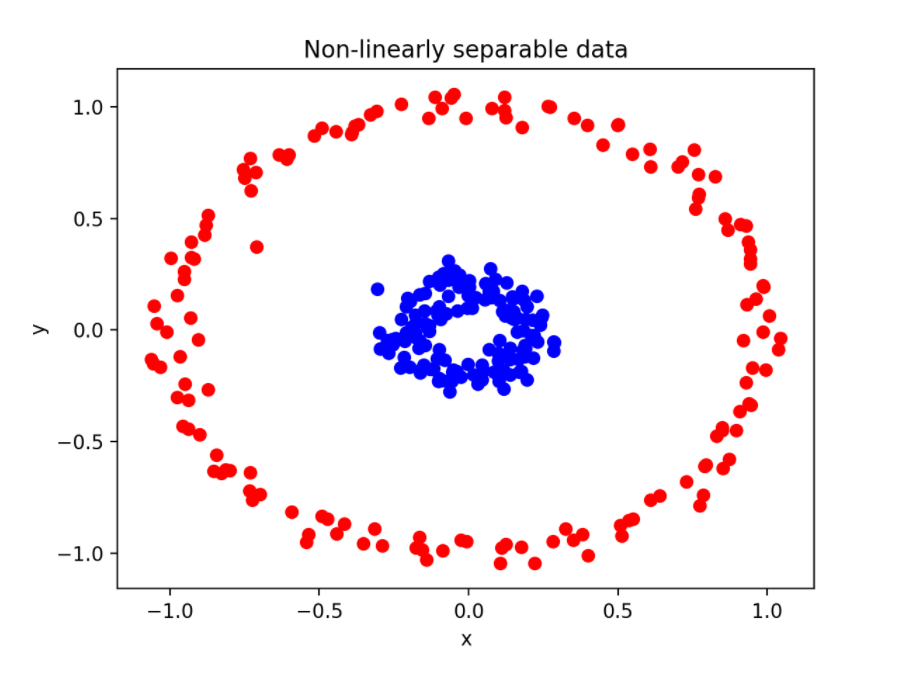

이때 SVM 모델을 만들 때 kernel을 지정하여 해결할 수 있다. 보통은 'linear'을 지정하지만 'poly' 같은 것을 지정할 수 있다.

In [48]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')

머신러닝 모델이 약간의 오차를 허용해야 하는 건 너무나 당연한 거라 단순히 outlier 때문에 선형으로 분리할 수 없다고 판단해서는 안 된다.  
일부 아웃라이어에 맞추기 위해 비선형으로 결정 경계를 만들 필요가 없다는 뜻이다. 모든 점을 올바르게 분리하는 선을 그린다는 건 결국 모델이 데이터에 과도하게 적합해진다는, 즉 오버피팅 된다는 것이다.

#### **1. 다항식(Polynomial)**

위의 데이터 분포는 단순한 선형으로 해결이 불가능하다. 이때 다항식(polynomial) 커널을 사용해서 2차원의 x, y좌표로 이루어진 점들을 3차원으로 표현할 수 있다.

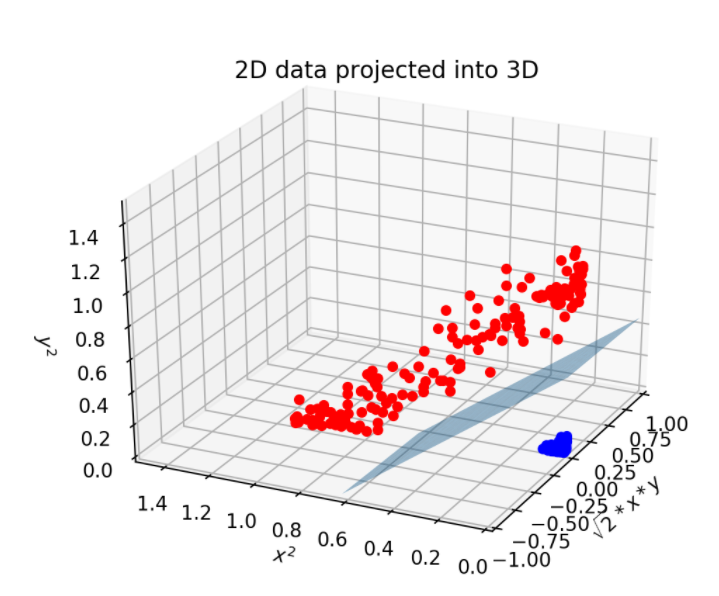

이처럼 **다항식(polynomial) 커널**을 사용하면 데이터를 더 높은 차원으로 변형하여 나타냄으로써 **초평면(hyperplane)의 결정 경계**를 얻을 수 있다.

#### **2. 방사 기저 함수 (RBF: Radial Bias Function)**

sciklit-learn에서 모델을 불러올 때 파라미터로 kernel 값을 따로 안 넣어주었을 때의 기본값은 'rbf'다.  
'poly'(다항식) 커널은 2차원의 점을 3차원으로 변환하지만 RBF 커널은 2차원의 점을 무한한 차원의 점으로 변환한다.  
RBF에는 'degree' 파라미터가 없다.

In [1]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')

### 파라미터 gamma

위에서 언급한 C와 마찬가지로 파라미터이다.  gamma는 결정 경계를 얼마나 유연하게 그을 것인지 정해준다. 학습 데이터에 얼마나 민감하게 반응할 것인지 모델을 조정하므로 C와 비슷한 개념이다.
- **gamma 값을 높이면** 학습 데이터에 많이 의존해서 결정 경계를 구불구불 그어서 **오버피팅**을 초래할 수 있다.
- **gamma 값을 낮추면** 학습 데이터에 별로 의존하지 않고 결정 경계를 직선에 가깝게 그어 **언더피팅**이 발생할 수 있다.

[gamma가 적당할 때]
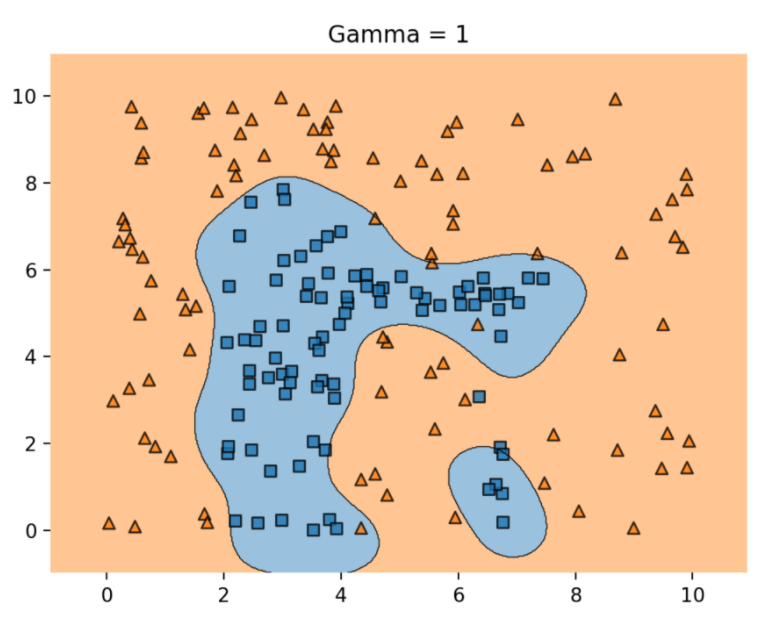

[gamma가 다소 높을 때]
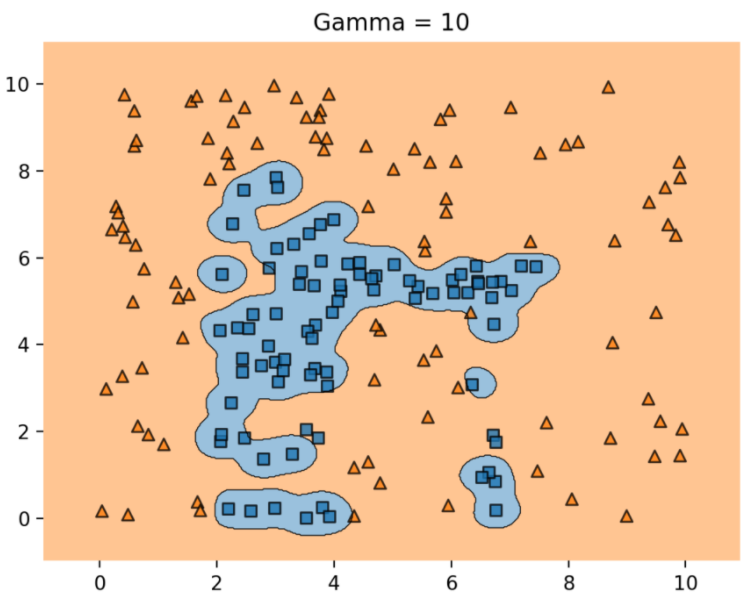

[gamma가 다소 낮을 때]
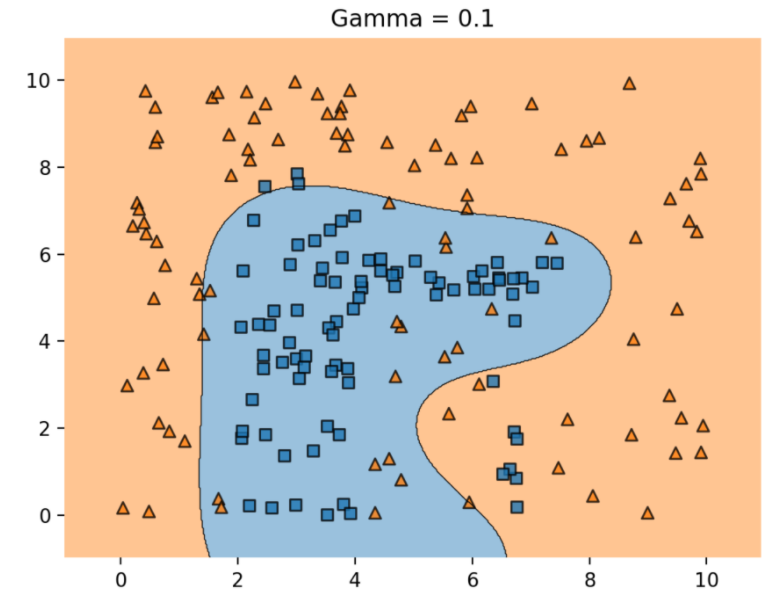

### 요약

- SVM은 분류에 사용되는 지도학습 머신러닝 모델이다.
- SVM은 서포트 벡터(support vectors)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류한다.
- 서포트 벡터(support vectors)는 결정 경계에 가장 가까운 각 클래스의 점들이다.
- 서포트 벡터와 결정 경계 사이의 거리를 마진(margin)이라고 한다.
- SVM은 허용 가능한 오류 범위 내에서 가능한 최대 마진을 만들려고 한다.
- 파라미터 C는 허용되는 오류 양을 조절한다. C 값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라 부른다. 반대로 C 값이 작을수록 오류를 더 많이 허용해서 소프트 마진(soft margin)을 만든다.
- SVM에서는 선형으로 분리할 수 없는 점들을 분류하기 위해 커널(kernel)을 사용한다.
- 커널(kernel)은 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환한다. 2차원의 점으로 나타낼 수 있는 데이터를 다항식(polynomial) 커널은 3차원으로, RBF 커널은 점을 무한한 차원으로 변환한다.
- RBF 커널에는 파라미터 감마(gamma)가 있다. 감마가 너무 크면 학습 데이터에 너무 의존해서 오버피팅이 발생할 수 있다.